In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
data = pd.DataFrame({
    "Potencia":[120,80,100,110,90,130,70,105,115,85],
    "Eficiencia":[92,65,75,85,68,95,60,80,88,70],
    "Idade":[3,8,5,4,7,2,10,6,3,9],
    "Tamanho":[50,40,55,60,48,62,40,58,56,47],
    "Consumo de Energia":['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente',
               'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']})

In [33]:
# Separado a base de daods em x e y
X= data[['Potencia','Eficiencia','Idade','Tamanho']]
y = data['Consumo de Energia']

In [34]:
#dividindo a base de dados em treino e teste

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
#Criação do modelo de Machine Learning
modelo= SVC(kernel='linear')
modelo.fit(X_train,y_train)

SVC(kernel='linear')

In [36]:
y_prev = modelo.predict(X_test)
X_test
y_prev

array(['Eficiente', 'Ineficiente', 'Eficiente'], dtype=object)

In [37]:
data.head(10)

,Potencia,Eficiencia,Idade,Tamanho,Consumo de Energia
0,120,92,3,50,Eficiente
1,80,65,8,40,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [38]:
# Calculo das métricas do algoritimo de machine learning
# acurácia = VP+VN / total
acc = accuracy_score(y_prev, y_test)
acc 

1.0

In [39]:
# Classificaton report
cr=classification_report(y_prev,y_test)
print(cr)

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [40]:
# Matriz de confusão
cm = confusion_matrix(y_prev,y_test)
print(cm)

[[2 0]
 [0 1]]


Text(50.72222222222221, 0.5, 'Real')

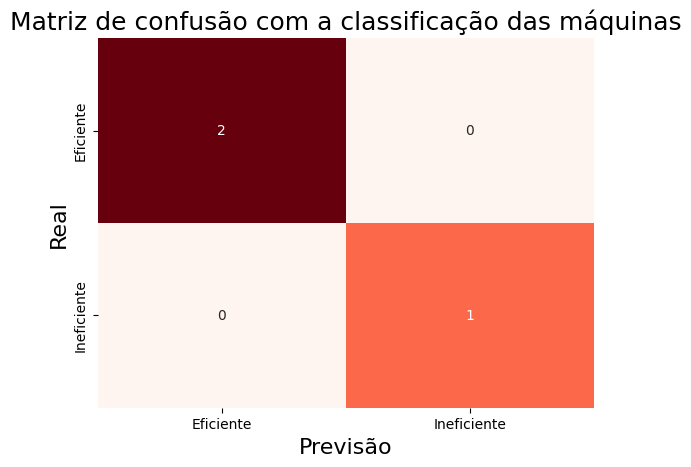

In [41]:
#Visualisando a matriz de confusão de forma grafica
sns.heatmap(cm,annot=True,cmap='Reds',cbar=False,
            xticklabels=['Eficiente','Ineficiente'],
            yticklabels=['Eficiente','Ineficiente'])
plt.title('Matriz de confusão com a classificação das máquinas',fontsize=18)
plt.xlabel('Previsão',fontsize=16)
plt.ylabel('Real',fontsize=16)

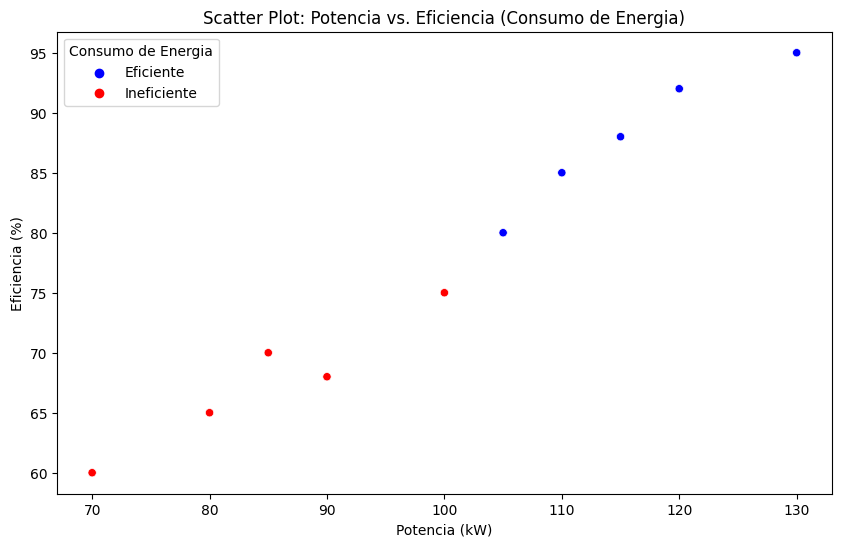

In [44]:
# Mapeando as cores com base na classe
palette = {"Eficiente": "blue", "Ineficiente": "red"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potencia', y='Eficiencia', hue='Consumo de Energia', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potencia vs. Eficiencia (Consumo de Energia)')
plt.xlabel('Potencia (kW)')
plt.ylabel('Eficiencia (%)')

# Mostrando o gráfico
plt.legend(title='Consumo de Energia')
plt.show()